In [2]:
import matplotlib.pyplot as plt

# For creating Datasets
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X.shape

(1000, 2)

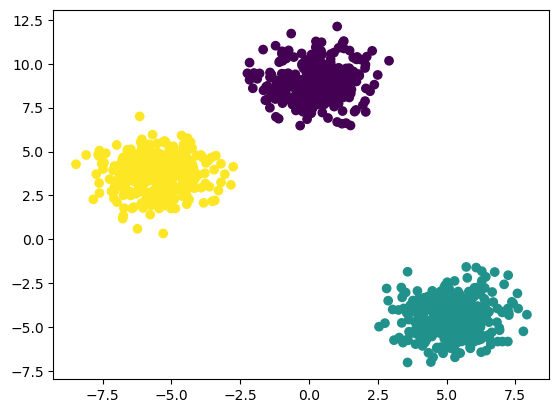

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)
# form this we can say that with color as y we can form 3 clusters

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Now applying K-Means

In [15]:
from sklearn.cluster import KMeans

# Manual method to find the value of K


In [21]:
# Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    # init is used for centroid initialize far away for accuray
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [22]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655123,
 991.8238694516631,
 853.7443804552724,
 756.6338638085035,
 664.2174867671422,
 577.8694044494711,
 531.2712195066795]

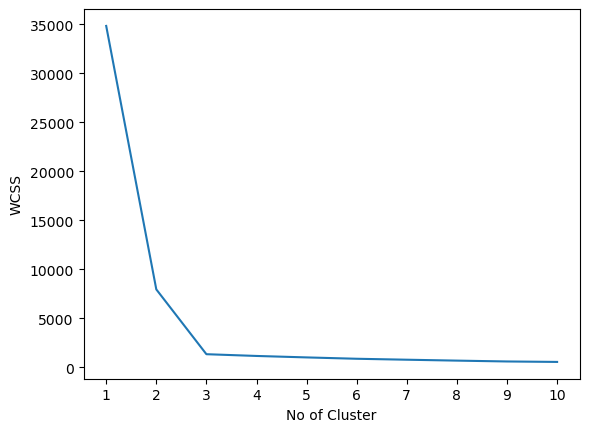

In [23]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans=KMeans(n_clusters=3,init="k-means++")


In [34]:
y_labels=kmeans.fit_predict(x_train)

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


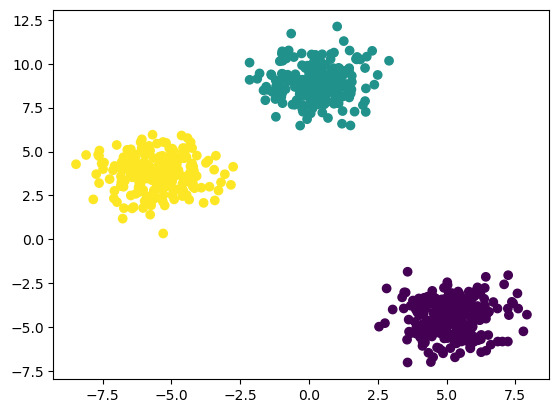

In [35]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [38]:
y_test_labels=kmeans.predict(x_test)

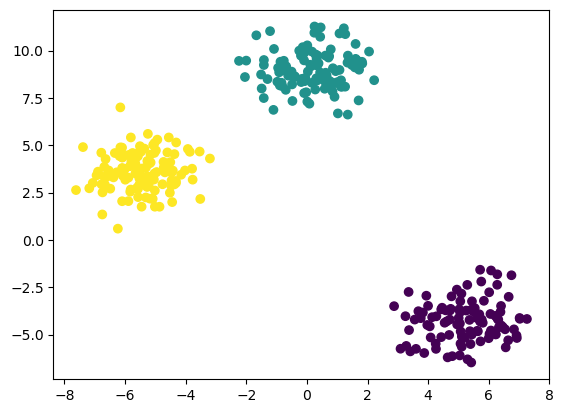

In [42]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_labels)

# As it is done manually using elbow method, it will not work properly on large dataset

In [43]:
!pip install kneed

In [47]:
from kneed import KneeLocator

In [48]:
# To find the value of k using libraray Kneed
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow
# convex as the curve is decreasing 

3

In [49]:
# Performance matrix
from sklearn.metrics import silhouette_score

In [53]:
ss=silhouette_score(x_test,y_test_labels)
ss

0.8017590194495865

In [55]:
ss_coefficients=[]
# ss=silhouette_coefficient
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    ss_coefficients.append(score)

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

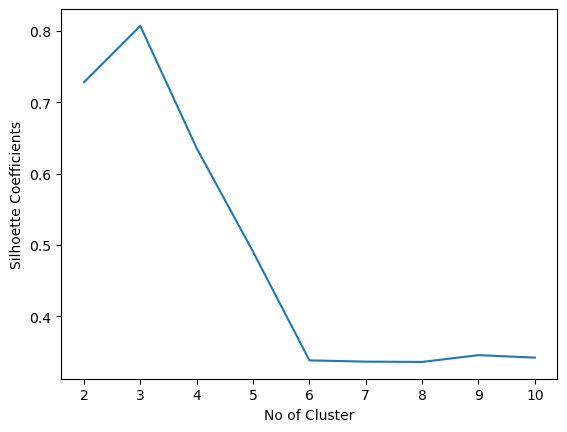

In [58]:
plt.plot(range(2,11),ss_coefficients)
plt.xticks(range(2,11))
plt.xlabel('No of Cluster')
plt.ylabel('Silhoette Coefficients')
plt.show()

In [59]:
# for 2 the value of ss_ coefficient is the largest 
# hence k=3 is the best value for clustering

# Hierarchial CLustering

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [71]:
iris=datasets.load_iris()

In [68]:
iris_data=pd.DataFrame(iris.data)

In [74]:
iris_data.columns=iris.feature_names

In [75]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# For scalling the data

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [90]:
from sklearn.model_selection import train_test_split
x_train_iris,x_test_iris=train_test_split(iris_data,test_size=0.33,random_state=42)

In [94]:
x_scaled_train=scaler.fit_transform(x_train_iris)
x_scaled_test=scaler.fit_transform(x_test_iris)

In [96]:
x_scaled_train.shape

(100, 4)

In [97]:
x_scaled_test.shape

(50, 4)

# Applying The PCA
# 4 features to 2 features

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [104]:
pca_scaled_x_train=pca.fit_transform(x_scaled_train)
pca_scaled_x_test=pca.fit_transform(x_scaled_test)

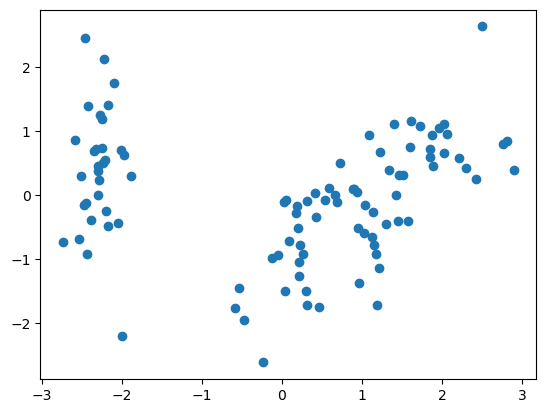

In [105]:
plt.scatter(pca_scaled_x_train[:,0],pca_scaled_x_train[:,1])

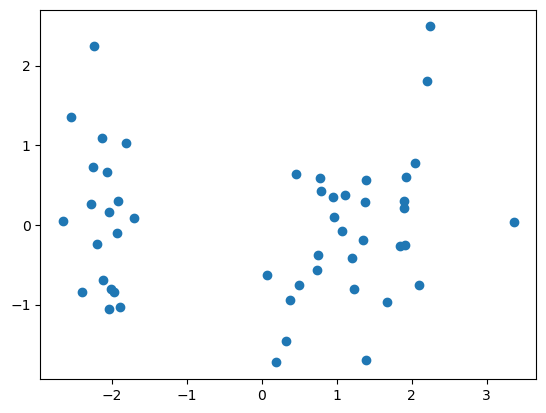

In [106]:
plt.scatter(pca_scaled_x_test[:,0],pca_scaled_x_test[:,1])

# Agglomerative CLustering

In [109]:
! pip install scipy

Text(0, 0.5, 'Ecludiean Distance')

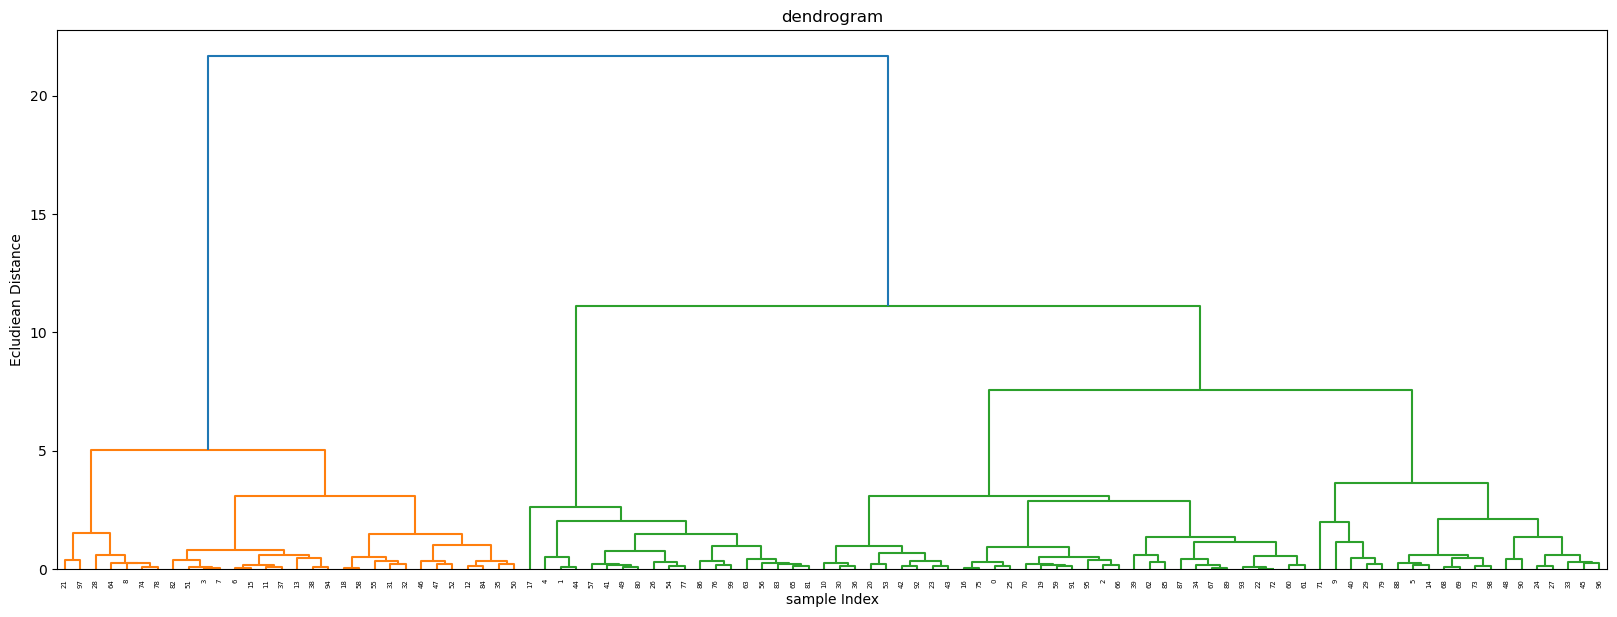

In [112]:
# To construct dendogram
import scipy.cluster.hierarchy as sc
# plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendogram")

# CREATE DENDOGRAM
sc.dendrogram(sc.linkage(pca_scaled_x_train,method="ward"))
plt.title("dendrogram")
plt.xlabel("sample Index")
plt.ylabel("Ecludiean Distance")

In [113]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled_x_train)

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [114]:
cluster.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

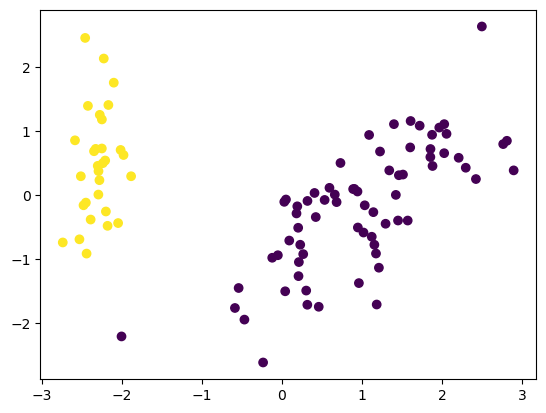

In [116]:
plt.scatter(pca_scaled_x_train[:,0],pca_scaled_x_train[:,1],c=cluster.labels_)

# DBSCAN

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
# it will create 2 interleaving half circles- for non-linear data

In [295]:
x,y=make_moons(n_samples=1000,noise=0.05,random_state=10000)
x,y=make_blobs(n_samples=1000,centers=10,n_features=2,random_state=23)

In [296]:
x

array([[ -6.39513039,   3.42395479],
       [-10.93691306,   7.21129206],
       [ -5.91571466,   3.3453255 ],
       ...,
       [ -0.90254593,   8.58605946],
       [ -4.65312531,  -4.75284873],
       [ -6.09079861,   3.2928798 ]])

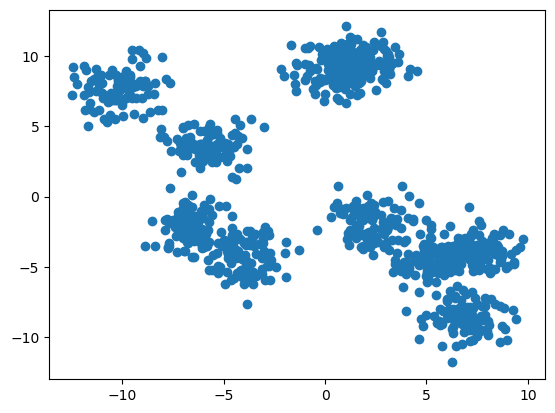

In [297]:
plt.scatter(x[:,0],x[:,1])

In [298]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [299]:
x_scaled=scaler.fit_transform(x)

# DBSCAN Algorithm

In [300]:
from sklearn.cluster import DBSCAN

In [301]:
dbscan=DBSCAN(eps=0.2,min_samples=3)

In [302]:
dbscan.fit(x_scaled)

DBSCAN(eps=0.2, min_samples=3)

In [303]:
labels=dbscan.labels_

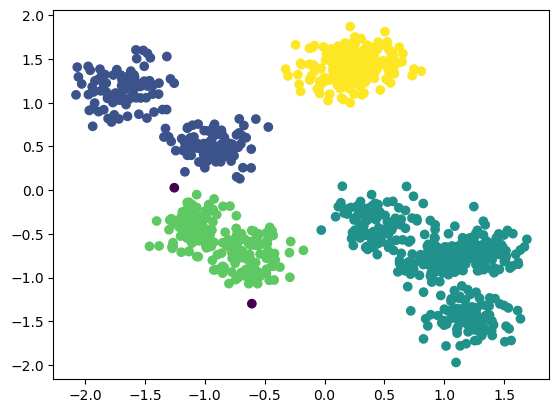

In [304]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels)